# PP422 - Scikit-Learn and LASSO Introduction Notebook

If needed, you can install the scikit learn package by running the following cell.

In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading initial packages
import pandas as pd
import numpy as np
# Packages for running a linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
# Packages for plotting
from lets_plot import *
LetsPlot.setup_html()

# Section 1 - Preparing Data in sklearn {-}

Many data sets must be __pre-processed__ before you can use them in regression or prediction tasks. Some common pre-processing steps include:

1. Standardizing variables
2. Adjusting categorical and other non-numeric variables
3. Handling missing data

The next two examples are designed to help you practice steps 1 and 2 above in the context of some of the machine learning functionality from the [sklearn](https://scikit-learn.org/stable/) library.

For this exercise, we will use data from the provided `Hitters.csv` file from the course textbook, which contains data on major league baseball players and their salary in 1987. For the full variable description, see the documentation [here](https://rdrr.io/cran/ISLR/man/Hitters.html). You will be asked to fit a LASSO model to this data to predict the `Salary` variable.

## Initial Data Examination {-}

Load in the `Hitters.csv` data set and examine the columns. Are there any missing variables? Are all of the columns numeric? If not, which columns are non-numeric? Are the numeric columns standardized (that is, do they have mean zero and variance 1)?

In [ ]:
# Your code here
hitters = pd.read_csv('/Users/anialatrofa/Desktop/London School of Economics/Y1/AT/Study Material/PP422/Python/Data/W9 Hitters.csv')

In [4]:
# General info on our data, looking at the Dtype column to see what is non-numeric
hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
# Missing values by column, the Salary column has 59 missing values
hitters.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [6]:
# Quick summary statistics of our data
hitters.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


Our data is not yet standardized (columns do not have mean 0 and variance 1). Our columns measured in different units (e.g. years, hits, dollars), so we cannot yet apply a common penalty to these values.

## Dropping Missing Values for the Outcome Variable {-}

For this analysis, the main outcome variable of interest will be `Salary`. If this variable has any missing observations, drop those rows from the dataset. After making this adjustment, do any other columns have missing data?

In [7]:
# Your code here:
hitters = hitters.dropna(subset='Salary')

## Removing Categorical Variables {-}

Any non-numeric variables will need to be adjusted and converted to numeric columns before fitting our models. We will return to this in later portions of the exercise. For now, create a new `DataFrame` which drops any non-numeric variables you identified above. 

A particular useful function for this is the pandas [select_dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) function, which allows us to extract (or exclude) columns based on their data types. We can use this to quickly extract all numeric or non-numeric columns without having to manually specify every column name.

Here is use the argument `exclude` to remove columns of a given type.

In [8]:
# Selecting based on column types, in this case I am excluding numeric columns to see the variables saved in other formats (e.g. strings)
hitters.select_dtypes(exclude=['float64','int64'])

,League,Division,NewLeague
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N
5,A,W,A
...,...,...,...
317,N,E,N
318,A,E,A
319,A,W,A
320,A,E,A


We could use `include` to directly extract the columns we care about. Here I create a sub dataframe storing only these columns.

In [9]:
# Selecting the variables we care about directly
hitters_sub = hitters.select_dtypes(include=['float64','int64'])

## Training / Testing Split  {-}

Split your data into a training and testing sample. Your training data should have 70% of the observations. The variable `Salary` should be treated as your outcome (or `y`) variable. All other numeric variables you identified above should be used as potential predictors.

The scikit-learn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function makes this process easy.

First, I can isolate my outcome variable `salary` from the remaining covariates.

In [10]:
# Separating our predictors and target variable
X_sub = hitters_sub.drop('Salary', axis=1)
y_sub = hitters_sub['Salary']

Then, I can provide both my `X` and `y` data to the `train_test_split()` function, which will divide these into a random training / testing split of a specified percentage.

In [11]:
# Training / testing split, saving our independent variables and target outcome
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub, y_sub, test_size=0.3, random_state=422)

In [15]:
# Can provide as many arrays as wanted, which are then split, and the double amount is returned
# Above, divide 'X_sub' into 'X_sub_train' and 'X_sub_test', and so on (according to the order given)

# We divided the data into Xs and Ys, then split, but could have been done the other way around (divide the data,
# then split into Xs and Ys)

Note, the `train_test_split()` function in this case will contain __4__ objects (the train / test samples for our features `X` and the train / test samples for our outcome variable `y`).

The above code unpacks these 4 different outcomes and saves them as the 4 different variables `X_sub_train`, `X_sub_test`, `y_sub_train`, `y_sub_test`

In [16]:
# Checking that the dimensions match
print(len(X_sub_train))
print(len(y_sub_train))

184
184


## Standardizing Variables {-}

The training / testing split you did above was on _unstandardized_ data; your columns are expressed in whatever units the initial data collection was done in. The documentation describes these units in detail, but consider the following two variables:

* `HmRun` is the number of home runs for the player in 1986
* `Years` is the number of years a player has been in the major leagues

While both are numeric, the actual values for these variables will have different meanings, and to make things comparable we will want to re-express them in terms of the number of standard deviations above or below the mean (for that variable) each observation is. We will calculate this standardization based on the training data only, and apply it to the testing data. This helps to ensure that no part of the testing data is "seen" during our model fitting process.

To accomplish this, you can use the `StandardScaler` function in the `sklearn` library. You can read the documentation for this function [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), and the following code will walk you through how it can be applied in this case.

First, you can load in this function by running the following code:

```python
from sklearn.preprocessing import StandardScaler
```

Once you have loaded in this package, you can _instantiate_ a `scaler` operator with the following code.

```python
scaler = StandardScaler()
```

This `scaler` object will have several methods related to standardizing outcomes. Two important methods we will use are:

1. `.fit()`
2. `.transform()`

The `.fit()` method will calculate the standardization process for provided data frame. The column means and variances from this data will be used for the standardization process for subsequently transformed data.

The `.transform()` method will apply the standardization defined by the previous `.fit()` method to a newly provided dataset. These functions can be applied together in the following code:

```python
scaler = scaler.fit(X_train)
X_train.iloc[:,:] = scaler.transform(X_train)
X_test.iloc[:,:] = scaler.transform(X_test)
```
To summarize the above code, the first line fits the scaling operation to the training data frame. The second line transforms the _training_ data with this operation, taking each value and subtracting the column mean and dividing by the column standard deviation. The third line transforms the _testing_ data with the same operation (which was defined with the training data). Note, the use of `.iloc[:,:]` in the above code ensures our saved results remain as a pandas DataFrame, but there are many techniques that could accomplish this.

Following the above approach, standardize the data from your training / testing split. After the standardization, examine summary statistics for each column in both the training and testing data sets. Did your standardization work?


In [17]:
# Checking our initial dimensions
X_sub_train.shape

(184, 16)

In [18]:
# Loading our new function:
from sklearn.preprocessing import StandardScaler

In [19]:
# Creating an instance of a standard scalar object
scaler = StandardScaler()

The above code creates a new object named `scaler` that saves the blueprint of instructions for standardizing a variable. The function however has not yet seen any data and thus will not have much stored within it. For example, the `.scale_` attribute is currently empty and will produce an error if we try to call it.

In [20]:
# Producing an error as we have not 'fit' our scalar() function to any data
scaler.scale_

AttributeError: 'StandardScaler' object has no attribute 'scale_'

We can call `.fit()` to calibrate this scaler object to our specific data. In this case, we will fit the model to our training data.

In [21]:
# Fitting the scaler model to our training data
scaler = scaler.fit(X_sub_train)

Now if we call the `.scale_` attribute, this has been populated with the specific values from our data set corresponding to the standard deviation of our specific variables. Similarly, the `.mean_` attribute contains the specific mean values.

In [22]:
print(scaler.mean_)
print(scaler.scale_)

[ 402.61413043  107.68478261   11.36956522   54.00543478   51.34782609
   40.28804348    7.30434783 2678.98369565  729.67391304   68.97282609
  362.13586957  332.55978261  254.9673913   286.11956522  116.41304348
    8.61956522]
[ 147.83671227   45.33904387    8.64419558   24.91387279   25.88852977
   21.57591926    4.917226   2385.54625609  677.79454705   81.53176442
  342.46260985  328.77069568  268.87244232  257.49997224  145.92278722
    6.67708995]


In [23]:
# Comparing this to the descriptive statistics of our model
X_sub_train.mean()

AtBat       402.614130
Hits        107.684783
HmRun        11.369565
Runs         54.005435
RBI          51.347826
Walks        40.288043
Years         7.304348
CAtBat     2678.983696
CHits       729.673913
CHmRun       68.972826
CRuns       362.135870
CRBI        332.559783
CWalks      254.967391
PutOuts     286.119565
Assists     116.413043
Errors        8.619565
dtype: float64

The mean in our training data for the first variable `AtBat` variable is `402.61` which exactly matches the first value stored in our `scaler.mean_` object.

After our `scaler` object has been modified to store this information on the mean and variance, we can apply these transformations to new data with the `.transform()` method. Using this function helps ensure we are applying the same standardization to new data, and the data type formats will  be aligned to work with our later models.

In [24]:
# Transforming our data with this scalar, and viewing the output
print(scaler.transform(X_sub_train).shape)
print(scaler.transform(X_sub_train))

(184, 16)
[[-1.86431453 -1.66930698 -0.38980668 ... -0.32667796 -0.64700685
  -0.99138476]
 [ 0.80078803  0.75685799  0.99840809 ... -0.69561004  0.86063979
   2.15369793]
 [-0.32883666 -0.67678495  0.53566983 ... -0.78881393  0.39463992
   1.10533703]
 ...
 [-0.22060914 -0.25772009  1.11409265 ... -0.57910517 -0.76350682
   0.05697614]
 [-0.98496597 -0.91940145 -0.73686038 ... -0.77327995  0.3398164
   0.80580535]
 [ 0.56404034  0.82302612 -0.04275299 ... -0.76939645  0.60022809
   1.10533703]]


After transforming, we can save over these columns in our original data frame.

In [25]:
X_sub_train.iloc[:,:] = scaler.transform(X_sub_train)
X_sub_test.iloc[:,:] = scaler.transform(X_sub_test)

/var/folders/r5/c67p3rz927ddb6mdh60hgcl80000gn/T/ipykernel_35421/3470869303.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.86431453  0.80078803 -0.32883666 -1.47875401 -1.70197326 -1.00525863
  1.24046231 -0.60616967  1.29457607  1.24722653 -0.99849441 -0.91055955
 -0.94438065  0.75343849 -0.80909626  0.02966699  0.36787797  0.63844676
  0.25965045 -1.33670539 -1.39758337 -0.51147059  0.92254398 -0.93085221
  0.41522751  0.67903208  0.83460913  0.83460913 -1.27582741 -0.40324307
 -1.30964851 -0.83615313  1.13223479  0.60462566  1.53132376  0.14465872
  1.18634855 -1.2352421  -0.05826787  0.72638161  0.46934127  0.08378074
  1.87629896 -0.61293389 -0.77527516 -1.15407146  1.05782838  0.25965045
 -1.55992464 -1.47198979 -0.63322654 -0.81586048 -1.07290082  1.61249439
 -0.18002383 -1.25553476 -1.26229898  1.51779532  1.19987699  0.85490179
 -0.82938892 -2.59485025  0.59109722 -0.13943851  1.22693387  0.469341

Now, we can view the variables in the training set to confirm things have been standardized.

In [26]:
# Examining the columns in the training data, which are not standardized
X_sub_train.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
AtBat,184.0,-0.0,1.0,-2.59,-0.82,0.04,0.83,1.92
Hits,184.0,-0.0,1.0,-2.35,-0.77,-0.10,0.74,2.54
HmRun,184.0,-0.0,1.0,-1.32,-0.74,-0.27,0.65,3.31
Runs,184.0,0.0,1.0,-2.17,-0.81,-0.10,0.72,2.61
RBI,184.0,-0.0,1.0,-1.98,-0.80,-0.17,0.76,2.69
Walks,184.0,0.0,1.0,-1.87,-0.85,-0.20,0.77,3.00
Years,184.0,0.0,1.0,-1.28,-0.72,-0.27,0.75,3.40
CAtBat,184.0,-0.0,1.0,-1.12,-0.81,-0.31,0.53,4.77
CHits,184.0,0.0,1.0,-1.07,-0.80,-0.31,0.52,5.20
CHmRun,184.0,0.0,1.0,-0.85,-0.67,-0.37,0.17,3.86


The testing data will __not__ be perfectly standardized, as we only apply the information from the training data (e.g. our mean and standard deviation used to standardize the data come only from observations in the training data).

In [28]:
# Examining the columns in the testing data
X_sub_test.describe().round(2).transpose()

# Not precisely mean = 0 and std = 1, no guarantee that training values are exactly the same as testing data.

,count,mean,std,min,25%,50%,75%,max
AtBat,79.0,0.02,0.99,-1.86,-0.79,0.10,0.84,1.86
Hits,79.0,0.01,0.98,-1.67,-0.82,-0.04,0.75,2.87
HmRun,79.0,0.10,1.04,-1.32,-0.74,-0.27,0.77,2.62
Runs,79.0,0.10,1.08,-1.61,-0.82,-0.04,0.98,3.05
RBI,79.0,0.02,1.00,-1.56,-0.84,-0.13,0.84,2.38
Walks,79.0,0.13,1.02,-1.54,-0.64,-0.06,0.84,2.49
Years,79.0,0.01,0.91,-1.28,-0.67,-0.27,0.55,2.58
CAtBat,79.0,-0.03,0.85,-1.05,-0.60,-0.31,0.35,2.87
CHits,79.0,-0.04,0.84,-1.00,-0.63,-0.32,0.27,2.63
CHmRun,79.0,0.01,1.03,-0.85,-0.65,-0.33,0.37,5.88


# Section 2 - LASSO Model Example {-}

## Fitting the LASSO Model {-}

After standardizing our model above, we can fit a LASSO model and report the relevant MSE values in both the training and testing data.

In the following example, we will make use of the [LassoCV](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LassoCV.html) function to fit this model. The CV in the function name stands for cross-validation. There are many parameters we can include in our call to this function. For this example we will set:

* `cv=10` which sets the number of folds we wish to use in cross-validation
* `random_state` which sets the random seed to make our function splits and calculations replicable.

In [32]:
# Creating the lasso object
# [Use cross-validation to find optimal penalty term – 'random state' to have the same process/result every time]
mod_lasso = LassoCV(cv=10, random_state=422)
# Calling the .fit() method to fit this explicit model to our data
mod_lasso_fit = mod_lasso.fit(X_sub_train, y_sub_train)

We can inspect the individual coefficient estimates with the `.coef_` attribute. These are the coefficients from the best model identified through cross-validation.

In [30]:
# Examining the remaining coefficients
mod_lasso_fit.coef_

array([-236.74446134,  235.52567689,  -39.59728262,   -0.        ,
          0.        ,  126.25083719,  -72.7458947 ,   -0.        ,
         52.71353542,  150.22449583,  191.83036509,   97.1491591 ,
       -192.3769457 ,   39.61422003,   68.8222043 ,  -50.61382913])

There is a separate `.intercept_` attribute containing the intercept term.

In [ ]:
# Examining the intercept term
mod_lasso_fit.intercept_

np.float64(525.1232228260869)

In [ ]:
# Allow the model to run up to 10 iterations max
# The problem given is that it stopped because it hit the maximum number of iterations allowed

mod_lasso_bad = LassoCV(cv=10, random_state=422, max_iter=10)
mod_lasso_fit_bad = mod_lasso_bad.fit(X_sub_train, y_sub_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6260.79030630365, tolerance: 3264.9135786703637
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8578.178696796298, tolerance: 3264.9135786703637
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9945.14478944242, tolerance: 3264.9135786703637
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:68

In [ ]:
# Setting to '-1?' it says that it'll take as many resources as the computer has, trying to be as quick as possible
# (to fit the model faster), not all machine learning models allow for it
mod_lasso_bad = LassoCV(cv=100, random_state=422, max_iter=10**3, n_jobs=-1)
mod_lasso_fit_bad = mod_lasso_bad.fit(X_sub_train, y_sub_train)

## Comparing to OLS Coefficients {-}

We can compare these coefficients to what we could get in the usual linear regression.

In [36]:
mod_ols = sm.OLS(y_sub_train, sm.add_constant(X_sub_train)).fit()
print(mod_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     10.25
Date:                Fri, 28 Nov 2025   Prob (F-statistic):           9.82e-18
Time:                        09:53:35   Log-Likelihood:                -1320.1
No. Observations:                 184   AIC:                             2674.
Df Residuals:                     167   BIC:                             2729.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        525.1232     24.450     21.477      0.0

In [39]:
mod_ols.params

const      525.123223
AtBat     -260.295344
Hits       251.734813
HmRun      -41.241005
Runs        -7.062443
RBI         -0.318403
Walks      135.805761
Years      -49.160685
CAtBat    -372.451181
CHits      359.417220
CHmRun     174.361767
CRuns      224.910431
CRBI        95.051943
CWalks    -198.587062
PutOuts     43.944673
Assists     86.484678
Errors     -55.997188
dtype: float64

__Student Question__ Create a new data frame `coefs` which stores the variables for both a LASSO and OLS regression (you will need to run the OLS regression). How do these variables compare?

In [40]:
# Your code here
coefs = pd.DataFrame(
    {
        'LASSO': mod_lasso_fit.coef_,
        'OLS': mod_ols.params[1:]
    }
)
coefs

# Even if we want to check the effect of a single increase in unit (in std, for LASSO), it's hard to interpret
# an increase holding all else constant (can HmRn – home runs – increase, if the rest does not,
# such as CHmRun –  career home runs)

,LASSO,OLS
AtBat,-236.744461,-260.295344
Hits,235.525677,251.734813
HmRun,-39.597283,-41.241005
Runs,-0.000000,-7.062443
RBI,0.000000,-0.318403
Walks,126.250837,135.805761
Years,-72.745895,-49.160685
CAtBat,-0.000000,-372.451181
CHits,52.713535,359.417220
CHmRun,150.224496,174.361767


In [42]:
# Your code here
coefs = pd.DataFrame(
    {
        'LASSO': mod_lasso_fit.coef_,
        'OLS': mod_ols.params[1:]
    }
)
coefs = coefs.reset_index(names='Variable')
coefs

,Variable,LASSO,OLS
0,AtBat,-236.744461,-260.295344
1,Hits,235.525677,251.734813
2,HmRun,-39.597283,-41.241005
3,Runs,-0.000000,-7.062443
4,RBI,0.000000,-0.318403
5,Walks,126.250837,135.805761
6,Years,-72.745895,-49.160685
7,CAtBat,-0.000000,-372.451181
8,CHits,52.713535,359.417220
9,CHmRun,150.224496,174.361767


## Plotting OLS And LASSO Coefficients {-}

We can plot these variables and see how they compare. Assuming we saved the coefficients in a data frame named `coef` with appropriate column names, we can use the below approach.

In [44]:
coef_plot = (
    ggplot(coefs)
    + geom_hline(yintercept=0, color='grey')
    + geom_point(aes(x='Variable', y='LASSO'), color='red')
    + geom_point(aes(x='Variable', y='OLS'), color='blue')    
    + labs(
        y='Coefficient Estimate Estimate'
    )
)
coef_plot

## Exploring Other LASSO Model Parameters {-}

### Penalty Parameters {-}

The penalty parameter is stored in the object as the `.alphas_` attribute. These are the different values of the penalty term that were considered in our model.

In [46]:
# Our model considered 100 candidate values for the penalty parameter
print(mod_lasso_fit.alphas_.shape)
print(mod_lasso_fit.alphas_)
# [In descending order]
# 20 out of 100 parameter values were below the value of 1

(100,)
[262.19495163 244.52388943 228.04379767 212.67440895 198.34086558
 184.97335506 172.50677002 160.88039108 150.03759117 139.92555968
 130.49504527 121.70011597 113.49793547 105.84855449  98.71471618
  92.06167469  85.85702594  80.07054974  74.67406268  69.64128078
  64.94769153  60.5704345   56.48818993  52.68107499  49.13054686
  45.81931243  42.73124413  39.85130129  37.16545696  34.66062955
  32.32461912  30.14604798  28.11430524  26.21949516  24.45238894
  22.80437977  21.26744089  19.83408656  18.49733551  17.250677
  16.08803911  15.00375912  13.99255597  13.04950453  12.1700116
  11.34979355  10.58485545   9.87147162   9.20616747   8.58570259
   8.00705497   7.46740627   6.96412808   6.49476915   6.05704345
   5.64881899   5.2681075    4.91305469   4.58193124   4.27312441
   3.98513013   3.7165457    3.46606295   3.23246191   3.0146048
   2.81143052   2.62194952   2.44523889   2.28043798   2.12674409
   1.98340866   1.84973355   1.7250677    1.60880391   1.50037591
   1.39

### MSE For Specific Penalty Parameters {-}

We can also see what the associated MSE was for these various values of the penalty term with the `.mse_path_` attribute.

In [47]:
# Checking the shape of this object
mod_lasso_fit.mse_path_.shape

(100, 10)

The `.mse_path_` attribute is of dimension 100x10. This corresponds to the 100 different candidate values of the penalty term we considered, and the 10 fold cross validation we conducted. For each value of the penalty term, we will have 10 different MSE estimates. We can these MSEs for the first penalty considered.

In [48]:
# Estimates of the MSE in each split
mod_lasso_fit.mse_path_[0]

# 100 values, 10 is the value for cross-validation

array([193920.54988514,  78939.95690335, 168790.51254032, 202629.99841701,
       375246.64481912, 327268.3000977 ,  74299.15106217, 207340.95892587,
       235635.4295446 , 113175.23347014])

In [50]:
mod_lasso_fit.mse_path_

array([[193920.54988514,  78939.95690335, 168790.51254032,
        202629.99841701, 375246.64481912, 327268.3000977 ,
         74299.15106217, 207340.95892587, 235635.4295446 ,
        113175.23347014],
       [190925.42786174,  74069.61752863, 160152.34680385,
        196938.78525626, 375246.64481912, 319106.67239321,
         68756.71016107, 203900.18336548, 226994.39601449,
        109416.18834097],
       [189537.1836878 ,  69891.34345553, 152343.92411471,
        192022.07302224, 375246.64481912, 309672.36935683,
         63901.3266605 , 191679.25160891, 218277.4117382 ,
        106403.98545079],
       [190610.0783195 ,  66311.10378626, 145319.79283998,
        187776.74363471, 366165.17462559, 301685.96371938,
         59645.85949324, 180763.11198111, 210841.58082921,
        104024.01189309],
       [192242.00949004,  63247.37732676, 138993.48571677,
        184113.26111784, 350339.57974076, 294944.10081448,
         55914.35949871, 171001.15660419, 204510.20821792,
        102

We can also calculate the average of these 10 separate estimates of the hold-out MSE for each value of the penalty term considered.

If we try calling the `.mean()` method we will get the mean of all the data points (rather than calculating a separate mean for each penalty parameter).

In [ ]:
# This calculates the aggregate mean, which is not what we want
# [it gives the mean of the whole set]
mod_lasso_fit.mse_path_.mean()

np.float64(136069.41759780067)

The `axis` argument will replicate this calculation along one of the dimensions in our numpy array.

In [51]:
type(mod_lasso_fit.mse_path_)

numpy.ndarray

In [ ]:
# Specifying the axis argument to calculate the mean across each column of our data
# [axis=0 gives the mean across rows]
mod_lasso_fit.mse_path_.mean(axis=1)

array([197724.67356654, 192550.69725448, 186897.55139146, 181314.34211221,
       175748.32901199, 170767.05367887, 166350.14241488, 162598.39493689,
       159567.14050797, 156986.73772277, 154403.32040733, 152004.24805517,
       149688.74868949, 147199.02012565, 144910.12580307, 142900.80245123,
       141081.50809474, 139488.69718302, 138134.38828562, 136985.13781723,
       136001.79330314, 135164.57690049, 134451.4411782 , 133844.19446723,
       133377.71741611, 132996.97370021, 132686.73901355, 132466.6537752 ,
       132340.7974163 , 132232.86279388, 132108.25841041, 132018.01929145,
       131976.10662072, 131986.51605444, 132020.14579825, 132102.63561649,
       132249.37529951, 132444.31867203, 132644.35686354, 132845.78856718,
       132988.42713748, 133096.71935329, 133177.08942225, 133218.52506781,
       133246.84397865, 133439.52906263, 133658.34369804, 133812.20738562,
       133981.76277919, 134033.79039419, 133931.10656209, 133676.90869411,
       133344.54755776, 1

In [53]:
# Finding the location of this minimum value
mod_lasso_fit.mse_path_.mean(axis=1).argmin()

np.int64(73)

In [54]:
# And using this location to find the actual lambda value
mod_lasso_fit.alphas_[mod_lasso_fit.mse_path_.mean(axis=1).argmin()]

np.float64(1.6088039107735375)

Which exactly matches the best alpha reported from the model.

In [55]:
mod_lasso_fit.alpha_

np.float64(1.6088039107735375)

In [56]:
mod_lasso_fit.coef_

array([-236.74446134,  235.52567689,  -39.59728262,   -0.        ,
          0.        ,  126.25083719,  -72.7458947 ,   -0.        ,
         52.71353542,  150.22449583,  191.83036509,   97.1491591 ,
       -192.3769457 ,   39.61422003,   68.8222043 ,  -50.61382913])

We could manually save these values along with the penalty terms themselves if we needed to do more comparison.

In [57]:
lambda_path = pd.DataFrame(
    {
        'log-lambda': np.log(mod_lasso_fit.alphas_),
        'avg_mse': mod_lasso_fit.mse_path_.mean(axis=1)
    }
)

<Axes: xlabel='log-lambda'>

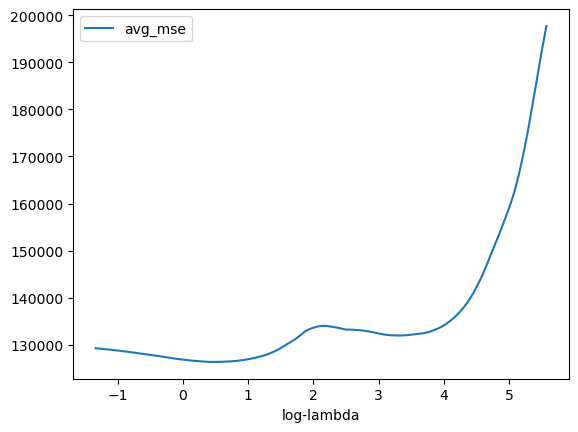

In [58]:
lambda_path.plot(x='log-lambda', y='avg_mse')

## Extracting Predicted Values {-}

We can extract predicted values from this model with the `.predict()` method.

In [59]:
# Predicting values on our training data
print(mod_lasso_fit.predict(X_sub_train).shape)
mod_lasso_fit.predict(X_sub_train)

(184,)


array([ 194.74149802,  257.4281856 , 1027.20735009,  412.06177296,
        282.32073984,  282.80210934,  566.56214017,  517.45737786,
        565.86644007,  624.97718524,  701.02232243,  196.9107064 ,
        347.36829212,  762.15580572,  518.3948817 ,  209.07645163,
        915.42273694,  546.00215806,  601.55976035,  223.66970179,
        288.82120596,  301.45266015,  471.54690003,  268.42193648,
        951.28916947,  619.76496042,  729.64407631,  744.31727227,
        240.88451456,  568.60814722,  230.01146594,  245.60969494,
        804.21749532,  742.24488245, 1169.16355936,  321.37995055,
        293.30424934,  240.91775103,  290.98621288,  686.35645476,
        598.8228876 ,  500.38816058,  556.283455  ,  155.34937935,
        265.52524638,  853.26994789,  696.41461231, 1303.13863611,
        413.15101748,  186.03289564,  528.39641225,  552.51381272,
        349.13668871,  592.23311172,  410.19896337,  222.21783559,
        314.37812622, 1015.17911579, 1046.89418268, 1153.65659

With these predictions, we could hand-calculate the associated MSE on the training data.

In [60]:
# Calculating MSE in our training data
np.mean((mod_lasso_fit.predict(X_sub_train)- y_sub_train)**2)

np.float64(100783.24935885174)

Or we can use the previously loaded `mean_squared_error()` function.

In [61]:
# Calculating and reporting the MSE values in the training data
mean_squared_error(mod_lasso_fit.predict(X_sub_train), y_sub_train).round(2)

AttributeError: 'float' object has no attribute 'round'

We can take the square-root of the MSE to place things back on the original scale of our outcome variable. This calculation is called the Root-MSE (RMSE).

In [62]:
np.sqrt(mean_squared_error(mod_lasso_fit.predict(X_sub_train), y_sub_train))

np.float64(317.46377645150596)

__Student Question__ Do we think the magnitude of this MSE or RMSE is big or small?

## Plotting Your Model Predictions {-}

In addition to MSE, you can also produce a scatterplot of your predicted values against the true values. This can give you an idea if your model is fitting certain regions of the data better than others, whereas a summary measurement like the MSE cannot provide this information.

Using your model predictions from above, create a well-labelled and formatted plot which places the predicted values from your model on one axis and the actual values from the data set on another axis. Show this plot for both the training and testing data and briefly comment on any patterns. 

In [63]:
# Your plot code here:
# Training Data
(
    ggplot()
    + geom_point(mapping=aes(x=y_sub_train, y=mod_lasso_fit.predict(X_sub_train)))
    + geom_point(aes(x=y_sub_train, y=mod_lasso_fit.predict(X_sub_train)))
    + geom_abline(slope=1, linetype='dashed')
    + labs(
        y='Predicted Salary',
        x='Actual Salary',
        title='LASSO Performance on Training Data',
        subtitle='1987 Annual Salary (in thousands)'
    )
    + scale_x_continuous(limits=[0, 2_500])
    + scale_y_continuous(limits=[0, 2_500])
    + theme_bw()
    )

In [64]:
# Testing Data
(
    ggplot()
    + geom_point(mapping=aes(x=y_sub_test, y=mod_lasso_fit.predict(X_sub_test)))
    + geom_point(aes(x=y_sub_test, y=mod_lasso_fit.predict(X_sub_test)))
    + geom_abline(slope=1, linetype='dashed')
    + labs(
        y='Predicted Salary',
        x='Actual Salary',
        title='LASSO Performance on Testing Data',
        subtitle='1987 Annual Salary (in thousands)'
    )
    + scale_x_continuous(limits=[0, 2_500])
    + scale_y_continuous(limits=[0, 2_500])
    + theme_bw()
    )

In [65]:
# At one point, out mode starts to under-predict (19 under-predictions in a row, until we over-predict – from the right)
# Ideally, our model would have the same amount of under- and over- predictions

One pattern that emerges from the above plots is that in both the training and testing data, our model under-predicts the Actual Salary for the highest salaries. For the top 10 largest actual salaries in the testing data (representing ~ 1/8 of the total testing sample) our model estimates of salary are too low (they fall below the 45-degree line). This problem also exists in the training data. A similar over-prediction problem occurs at low salary values.

This is a common feature of linear models of this type that tend to have a difficult time consistently predicting accurately at the extremes of the distribution. 

## OPTIONAL Fitting a Ridge Regression {-}

Ridge regression is another regularized regression we introduced alongside the LASSO regression. You can load in functionality to estimate this with cross validation with the following code:

```python
from sklearn.linear_model import RidgeCV
```
And you can read the corresponding documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

Fit this model and calculate the MSE in the training and testing data. How does the performance of the Ridge regression compare to the LASSO for this data set?

In [66]:
# Your code here
from sklearn.linear_model import RidgeCV

mod_ridge_sub = RidgeCV(cv=10).fit(X_sub_train, y_sub_train)
# MSE in the training for ridge
print(mean_squared_error(mod_ridge_sub.predict(X_sub_train), y_sub_train).round(0))
# MSE in the testing for ridge
print(mean_squared_error(mod_ridge_sub.predict(X_sub_test), y_sub_test).round(0))

AttributeError: 'float' object has no attribute 'round'

In [67]:
mod_ridge_sub.coef_

array([-100.13047714,  101.5477493 ,  -46.97381544,   29.92993624,
         17.79188919,   86.9837002 ,  -61.38412494,    9.16965958,
         85.00123344,  116.74149543,   80.14906721,   98.1103455 ,
        -99.37753308,   34.52292923,   55.77557797,  -51.17489654])

In [68]:
# Adding the ridge regression coefficients to our earlier dataframe
coefs['Ridge'] = mod_ridge_sub.coef_
coefs

,Variable,LASSO,OLS,Ridge
0,AtBat,-236.744461,-260.295344,-100.130477
1,Hits,235.525677,251.734813,101.547749
2,HmRun,-39.597283,-41.241005,-46.973815
3,Runs,-0.000000,-7.062443,29.929936
4,RBI,0.000000,-0.318403,17.791889
5,Walks,126.250837,135.805761,86.983700
6,Years,-72.745895,-49.160685,-61.384125
7,CAtBat,-0.000000,-372.451181,9.169660
8,CHits,52.713535,359.417220,85.001233
9,CHmRun,150.224496,174.361767,116.741495


In [69]:
# Updating our prior plot
(
    coef_plot + 
    geom_point(aes(x='Variable', y='Ridge'), color='darkgreen')
)

In [70]:
np.sqrt(mean_squared_error(mod_ridge_sub.predict(X_sub_test), y_sub_test)).round(2)

np.float64(336.1)

The RMSE for the Ridge and LASSO regressions are approximately the same. While the LASSO RMSE is slightly lower, the difference is not practically significant given the underlying variation in the outcome variable. 

# Section 3 - Categorical Variables and sklearn {-}

In the exercise above we focused on standardizing numeric variables after dropping the non-numeric variables. If we would like to retain the non-numeric variables, we need to convert them to numeric dummy variables. This question asks you to do just that and update your previous results.

## Creating dummy variables with pandas {-}

One way to generate dummy variables is with the pandas `pd.get_dummies()` function, with corresponding documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). Returning to the `Hitters.csv` data, if you saved your your data as a variable `hitters`, the following code will generate a new DataFrame with numeric columns for the categorical variables.

```python
pd.get_dummies(hitters)
```

Run this code and examine the resulting DataFrame. How many columns does it have and how does this compare to the number of columns in the initial DataFrame. Explain explicitly why the number of columns changed by the number it did.

In [71]:
# Your code here
hitters = pd.get_dummies(hitters)
hitters.shape

(263, 23)

The number of columns increased to 23 from an initial level of 20. This reflects the incorporation of 3 additional dummy variables for the 3 categorical variables that we have. Each categorical variable had two categories and thus is represented by two specific dummy columns in the new data frame. The original dataframe included a single column for each of these variables, so we increased from 3 to 6 columns representing these measures.

## Refitting your models with Categorical Variables {-}

Refit your LASSO model from above on this new data containing the dummy variables for non-numeric columns. There are several possible ways to do this, but you can use the following steps:

1. Ensure appropriate dummy variables are added to your DataFrame for non-numeric columns.
2. Split the data into a training and testing set, using the same random state (422) you used above to make your results replicable.
3. Standardize only the original __numeric__ columns from your DataFrame. You should not standardize the dummy variable columns created for the non-numeric data. This standardization should be done relative to the mean / variance values in the training data only.
4. Apply the standardization from step 3 to both the training and testing data. 

To summarize, after completing these steps, your training and testing data should each contain standardized measures for all the original numeric columns, while containing dummy variables (1s or 0s) corresponding to the original non-numeric columns.

After pre-processing the data in this way, re-fit your LASSO model and calculate and report the MSE in the training and testing samples. Did the inclusion of these non-numeric variables improve your predictions?

Hint: Note, that you can provide a subset of columns to the `StandardScaler()` methods. In this case you may find it helpful to only provide the original numeric variables to this operation. You can then transform only these variables but you will also need to make sure you only save over these variables in your DataFrame after the transformation.

To do this, you could store a list of variable names to include or exclude in the various steps. Alternatively, you may find it useful to use the pandas method `select_dtypes()`. This method will allow you to identify a subset of columns matching a certain data type. You can read about this function and see some examples at the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

In [72]:
X = hitters.drop('Salary', axis=1)
y = hitters['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=422)

# Save numeric columns
numeric_columns = X.select_dtypes(['int64']).columns

# Loading the scaler object
scaler = StandardScaler()

# Fitting the scaler model to our training data
scaler = scaler.fit(X_train[numeric_columns])

# Saving the standardization over our data
X_train[numeric_columns] = scaler.transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [73]:
X_train.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
AtBat,184.0,-0.0,1.0,-2.59,-0.82,0.04,0.83,1.92
Hits,184.0,-0.0,1.0,-2.35,-0.77,-0.10,0.74,2.54
HmRun,184.0,-0.0,1.0,-1.32,-0.74,-0.27,0.65,3.31
Runs,184.0,0.0,1.0,-2.17,-0.81,-0.10,0.72,2.61
RBI,184.0,-0.0,1.0,-1.98,-0.80,-0.17,0.76,2.69
Walks,184.0,0.0,1.0,-1.87,-0.85,-0.20,0.77,3.00
Years,184.0,0.0,1.0,-1.28,-0.72,-0.27,0.75,3.40
CAtBat,184.0,-0.0,1.0,-1.12,-0.81,-0.31,0.53,4.77
CHits,184.0,0.0,1.0,-1.07,-0.80,-0.31,0.52,5.20
CHmRun,184.0,0.0,1.0,-0.85,-0.67,-0.37,0.17,3.86


In [74]:
y_train

19     135.000
68     105.000
121    200.000
174    450.000
151     95.000
        ...   
154    277.500
267    740.000
120    733.333
164    250.000
252    500.000
Name: Salary, Length: 184, dtype: float64

In [75]:
# Refitting the Model
mod_lasso = LassoCV(cv=10, random_state=422).fit(X_train, y_train)

In [76]:
# Examining coefficients
pd.DataFrame(
    {
    'variable': X_train.columns,
    'coef_lasso': mod_lasso.coef_,
    }
).round(2)

,variable,coef_lasso
0,AtBat,-211.88
1,Hits,209.18
2,HmRun,-31.63
3,Runs,0.00
4,RBI,-0.00
5,Walks,124.59
6,Years,-81.13
7,CAtBat,-0.00
8,CHits,109.20
9,CHmRun,140.01


In [77]:
# Calculating new MSE in training
print(mean_squared_error(mod_lasso.predict(X_train), y_train).round(0))

AttributeError: 'float' object has no attribute 'round'

In [78]:
# Calculating new MSE in testing
print(mean_squared_error(mod_lasso.predict(X_test), y_test))
# Calculating new RMSE in testing
print(np.sqrt(mean_squared_error(mod_lasso.predict(X_test), y_test)))

105332.903210328
324.55030921311413


Some of the newly included categorical variables are found to be significant, and the overall RMSE fell from 330.7 in the previous LASSO model to 324.6 in the new model. This difference in size does not appear practically significant given the variance in the underlying model, but it is also a relatively easy addition to make to the model to boost performance as it did not require collecting or maintaining additional data.